## Transfer Learning VGG16

## Kaggle: Chest X-Ray Images (Pneumonia) - to classify checst images belonging to 2 classes Normal or Pneumonia 

#### Dataset Link: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

#### importing the libraries

In [ ]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SIZE = [224, 224]#resize the images

#importing kaggle dataset
train_path = '../input/chest-xray-pneumonia/chest_xray/train'
valid_path = '../input/chest-xray-pneumonia/chest_xray/test'

In [ ]:
folders = glob('../input/chest-xray-pneumonia/chest_xray/train/*')
folders#glob helps to find the fodlers present within a directory

['../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL']

#### Load the model

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#model compilation: what cost function and optimizer to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

#Image Data Generator to import the images from the dataset(train and test datasets)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
#run the model
vgg16 = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 144s 860ms/step - loss: 0.4336 - accuracy: 0.8549 - val_loss: 0.2877 - val_accuracy: 0.9006
Epoch 2/5
163/163 [==============================] - 105s 644ms/step - loss: 0.1108 - accuracy: 0.9583 - val_loss: 0.2703 - val_accuracy: 0.9038
Epoch 3/5
163/163 [==============================] - 105s 642ms/step - loss: 0.1168 - accuracy: 0.9577 - val_loss: 0.2876 - val_accuracy: 0.9071
Epoch 4/5
163/163 [==============================] - 104s 639ms/step - loss: 0.0711 - accuracy: 0.9739 - val_loss: 0.6413 - val_accuracy: 0.8397
Epoch 5/5
163/163 [==============================] - 103s 634ms/step - loss: 0.0954 - accuracy: 0.9642 - val_loss: 0.3610 - val_accuracy: 0.9071


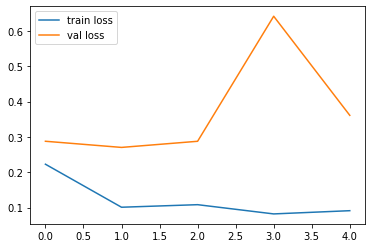

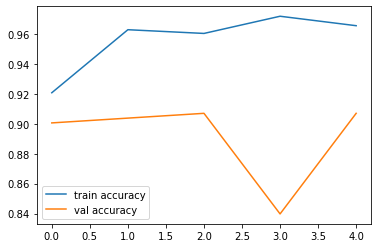

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(vgg16.history['loss'], label='train loss')
plt.plot(vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg16.history['accuracy'], label='train accuracy')
plt.plot(vgg16.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save the model as a h5 file
from tensorflow.keras.models import load_model
model.save('chestxray_vgg16.h5')
MODEL_PATH ='chestxray_vgg16.h5'
# Load your trained model
model = load_model(MODEL_PATH)

#### Validate our model

In [ ]:
print(training_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
test_image = image.load_img('../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg',
                            target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image=preprocess_input(test_image)
result = model.predict(test_image)
print(result)
if result[0][1]>0.5:
    print("Pneumonia")
else:
    print("Normal")

[[0.9481543  0.05184577]]
Normal


In [ ]:
test_image = image.load_img('../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg',
                            target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image=preprocess_input(test_image)
result = model.predict(test_image)
print(result)
if result[0][1]>0.5:
    print("Pneumonia")
else:
    print("Normal")

[[0.03357628 0.9664237 ]]
Pneumonia


In [ ]:
test_image = image.load_img('../input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg',
                            target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image=preprocess_input(test_image)
result = model.predict(test_image)
print(result)
if result[0][1]>0.5:
    print("Pneumonia")
else:
    print("Normal")

[[0.9986879  0.00131204]]
Normal
